# Exploratory Data Analysis

**Project:** Predicting Housing Prices

This notebook will perform a deep dive into housing dataset.We will explore all the features, analyze their relationships with the target variable (`price`), and identify the preprocessing steps needed for our modeling notebook.

The primary objectives of this EDA is to:
- Analyze Target Variable
- Explore Numerical Features
- Explore Categorical Features
- Discover any preprocessing steps to improve the dataset

After the EDA, at the end of the notebook, we have the preprocessing steps listed out for our data_preprocessing notebook for organization.

### About the Dataset

This dataset contains the housing prices and information from Seattle, Washington. This dataset has a total of 21 features before preprocessing, including bathrooms, bedrooms, floors, date, year rennovated, year built, etc. 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
df = pd.read_csv("../new_data_archive/Housing.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

### Analysis:
- Id needs to be dropped
- date needs to be converted

In [4]:
df = df.drop(['id'], axis=1)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# covert 'date' to datetime object
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [6]:
# extract year and month as new features
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df = df.drop('date', axis=1)

**Note**: With sale_year and sale_month, you can make analysis like "a house sold in december may be cheaper than on sold in spring." Hence, we can drop the date column and keep sale_year and sale_month.

In [7]:
print(df[['sale_year', 'sale_month']].head())

   sale_year  sale_month
0       2014          10
1       2014          12
2       2015           2
3       2014          12
4       2015           2


Additionally, since we are using zipcode column, we can drop lat and long

In [8]:
df = df.drop(['lat', 'long'], axis=1)
df.columns #should not have lat, long, date, and id

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'sale_year', 'sale_month'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  sale_year      21613 non-null  int32  
 18  sale_m

**Summary of Data**

In [10]:
# Shape and basic summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sale_year,sale_month
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,2014.322954,6.574423
std,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631,0.467616,3.115308
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2015.000000,12.000000


In [11]:
#data dictionary - what each variable measures and expected units/range
def create_data_dictionary(df):
    """
    Analyzes a DataFrame and creates a summary DataFrame
    to act as a data dictionary.
    """
    data_dict = []
    
    for col in df.columns:
        col_info = {
            "Column": col,
            "Dtype": df[col].dtype,
            "Nulls": df[col].isnull().sum(),
            "Unique_Count": df[col].nunique(),
            "Range_Or_Examples": ""
        }
        
        # Check if column is numerical
        if pd.api.types.is_numeric_dtype(df[col]):
            min_val = df[col].min()
            max_val = df[col].max()
            col_info["Range_Or_Examples"] = f"Min: {min_val}, Max: {max_val}"
            
        # Check if column is datetime
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            min_val = df[col].min().strftime('%Y-%m-%d')
            max_val = df[col].max().strftime('%Y-%m-%d')
            col_info["Range_Or_Examples"] = f"Min: {min_val}, Max: {max_val}"
            
        # Treat as categorical/object
        else:
            unique_vals = df[col].unique()
            if len(unique_vals) > 7:
                # Show first 5 examples if too many unique values
                col_info["Range_Or_Examples"] = f"{list(unique_vals[:5])}..."
            else:
                # Show all unique values if there aren't many
                col_info["Range_Or_Examples"] = list(unique_vals)
                
        data_dict.append(col_info)
    
    return pd.DataFrame(data_dict).set_index('Column')

# --- Run the function and display the results ---

# Set display options to see all text
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Create and print the dictionary DataFrame
dictionary_df = create_data_dictionary(df)
print("--- Data Dictionary Analysis ---")
display(dictionary_df)

--- Data Dictionary Analysis ---


,Dtype,Nulls,Unique_Count,Range_Or_Examples
Column,,,,
price,float64,0,4029,"Min: 75000.0, Max: 7700000.0"
bedrooms,int64,0,13,"Min: 0, Max: 33"
bathrooms,float64,0,30,"Min: 0.0, Max: 8.0"
sqft_living,int64,0,1038,"Min: 290, Max: 13540"
sqft_lot,int64,0,9782,"Min: 520, Max: 1651359"
floors,float64,0,6,"Min: 1.0, Max: 3.5"
waterfront,int64,0,2,"Min: 0, Max: 1"
view,int64,0,5,"Min: 0, Max: 4"
condition,int64,0,5,"Min: 1, Max: 5"


**Checking for Duplicate Rows**

In [12]:
duplicated_vals = df.duplicated().sum()
print(f"Number of Duplicated Values: {duplicated_vals}")

Number of Duplicated Values: 2


In [13]:
# Since its only sale_year that have duplicate values, we can keep it
df[df.duplicated()]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sale_year,sale_month
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,1070,928,2015,3
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,1510,1352,2015,3


In [14]:
# Check if the sum of above + basement equals living
check_sum = (df['sqft_above'] + df['sqft_basement']) - df['sqft_living']
print(f"Sum of (above + basement) - living: {check_sum.sum()}")
# if result is zero, then it is the same.

Sum of (above + basement) - living: 0


In [15]:
# Drop the sqft_above and sqft_basement since adding them == sqft_living
#  this is to avoid redundant features, handling multicolinearity
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sale_year,sale_month
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,1800,7503,2015,2


## Target Variable - Price


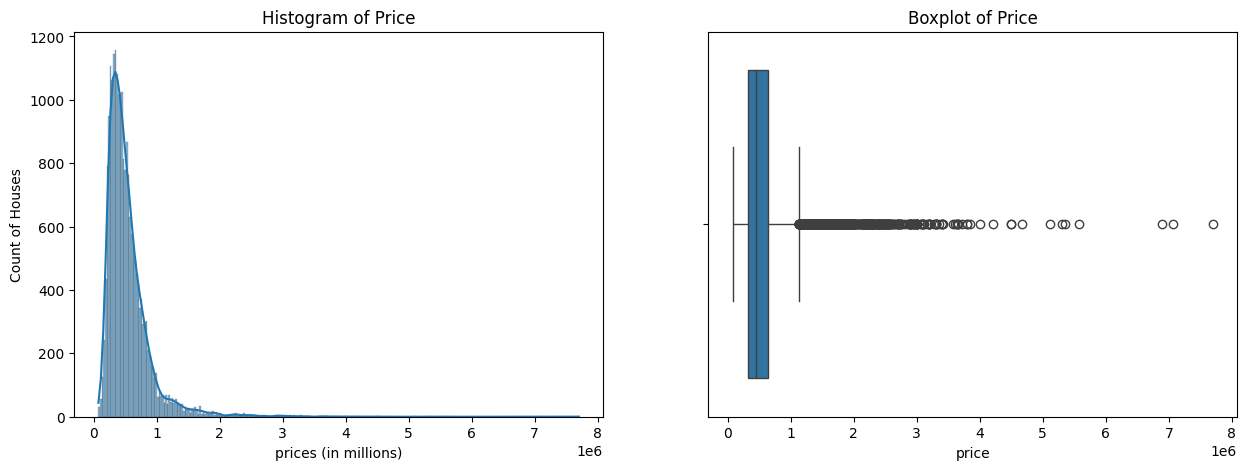

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# histogram plot
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_ylabel('Count of Houses')
axes[0].set_xlabel('prices (in millions)')

# boxplot
sns.boxplot(x=df['price'], ax=axes[1])
axes[1].set_title('Boxplot of Price')
plt.show()

# 1e6 is a scientific notation, it just means 1 x 10^6 = 1000000

### Analysis of Target and Visuals

Histogram
- Right-skewed distribution.
- Means that most houses in dataset are clustered at the lower-medium price range (refer to the big hump on the left).
- The long tail to the right represents smaller number of very expensive houses.

Boxplot:
- Box is compressed to the left.
- Huge number of outliers on the right (the very expensive houses that makes the data skewed.)


Preprocessing step:
- Use Log Transformation to make the 'price' column evenly distributed.
- This will help ML models work much better, prevents bias to expensive outliers.

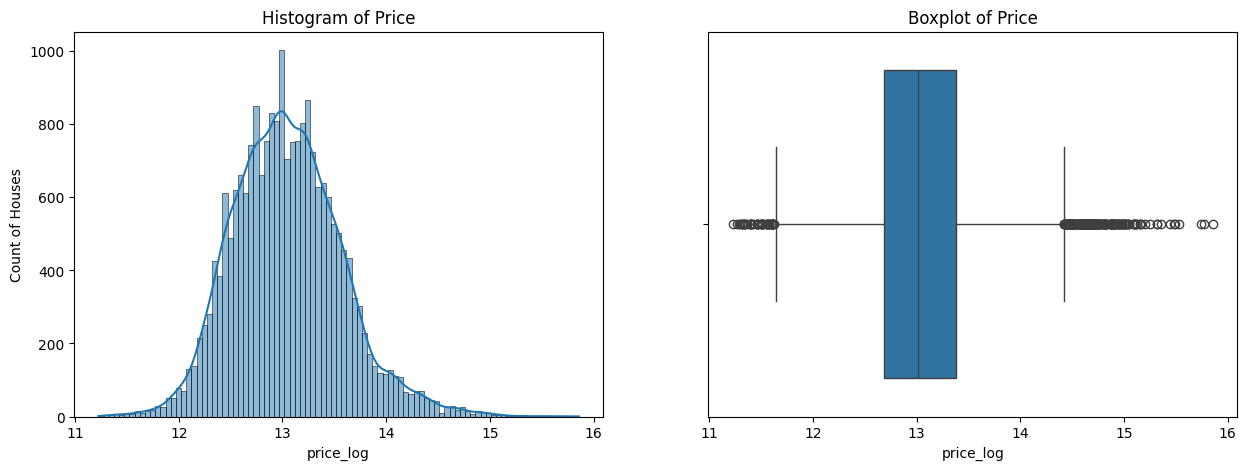

In [17]:
# apply log transformation
df['price_log'] = np.log1p(df['price'])

# now plot it again to see the difference
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# histogram plot
sns.histplot(df['price_log'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_ylabel('Count of Houses')


# boxplot
sns.boxplot(x=df['price_log'], ax=axes[1])
axes[1].set_title('Boxplot of Price')
plt.show()

### Notes:
- This ['price_log'] column is to be used for the model instead of ['price'].
- Note that during the modeling, you will do inverse np.expm1() to change model's predictions into real dollar amount.

## Numerical Features vs. Price

Continuous features: sqft_living, sqft_lot, sqft_living15, sqftlot15

Discrete Features: bedrooms, bathrooms, floors, waterfront

### Continuous Features vs Price Analysis
Continuous features: sqft_living, sqft_lot, sqft_living15, sqftlot15

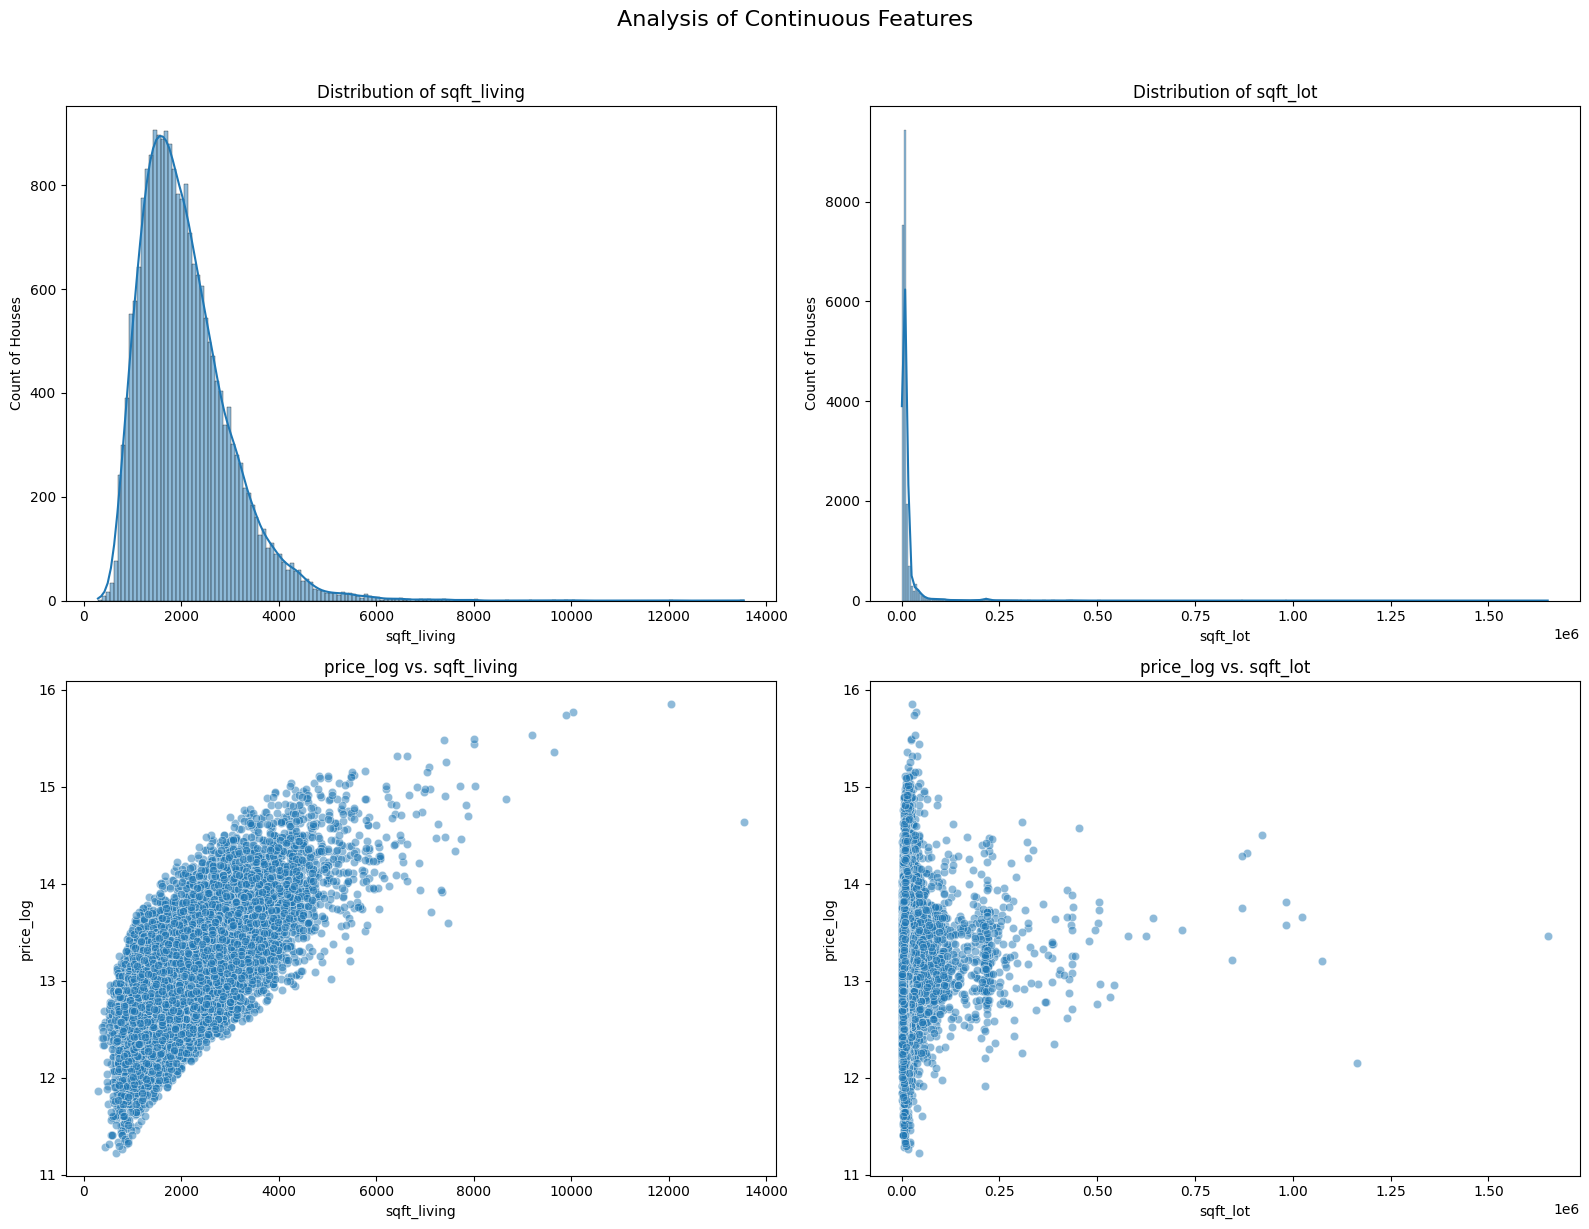

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analysis of Continuous Features', fontsize=16, y=1.02)

# Histogram for sqft_living
sns.histplot(df['sqft_living'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of sqft_living')
axes[0, 0].set_ylabel('Count of Houses')

# Histogram for sqft_lot
sns.histplot(df['sqft_lot'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of sqft_lot')
axes[0, 1].set_ylabel('Count of Houses')

# Scatterplot for sqft_living vs. price
sns.scatterplot(x=df['sqft_living'], y=df['price_log'], ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('price_log vs. sqft_living')

# Scatterplot for sqft_lot vs. price
sns.scatterplot(x=df['sqft_lot'], y=df['price_log'], ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('price_log vs. sqft_lot')

plt.tight_layout()
plt.show()


### Analysis:

**sqft_living** - interior, habitable space of a home.
- Right-skewed distribution, means most houses have a typical living area, with few very large ones.
- Strong, positive linear relationship shown in scatterplot. As sqft_living goes up, price goes up.

**sqft_lot** - total area of the land the property sits on, including all outdoor space, but does not include the interior of the house itself.
- Extremely right skewed.
- Scatterplot has a weaker positive trend.

Beacuse they are heavily skewed, applying log transform to both will help linear models perform better.


### Analysis of sqft_living15 and sqft_lot15

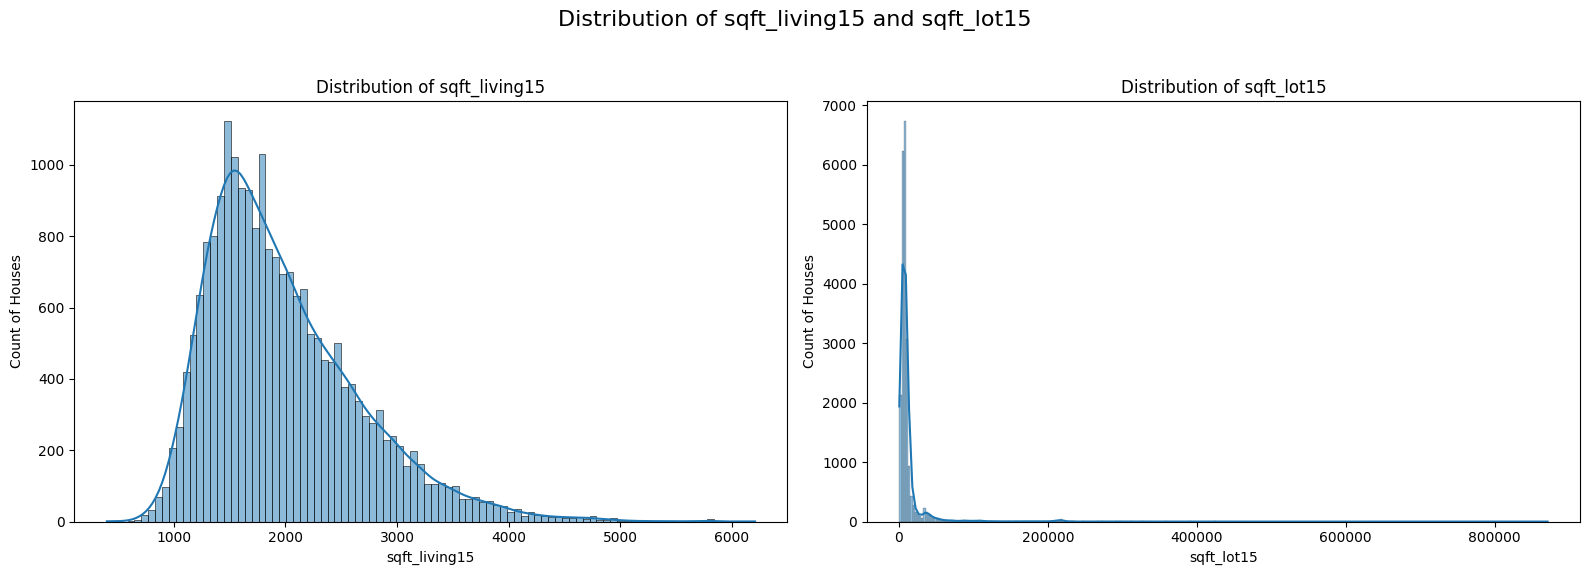

In [25]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of sqft_living15 and sqft_lot15', fontsize=16)

# Plot 1: sqft_living15
sns.histplot(df['sqft_living15'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of sqft_living15')
axes[0].set_ylabel('Count of Houses')

# Plot 2: sqft_lot15
sns.histplot(df['sqft_lot15'], kde=True, ax=axes[1]) 
axes[1].set_title('Distribution of sqft_lot15') 
axes[1].set_ylabel('Count of Houses')

# Use tight_layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make room for suptitle
plt.show()

### Apply log transformation to continuous features
After applying log transformation, drop the original columns.

Know the difference between them.

- sqft_living_log - "How big is this house?"
- sqft_living15_log - "How big are the neighboring houses?"
- sqft_lot_log - "How big is the property this house sits on?"
- sqft_lot15_log - "How big are the neighboring properties?"

In [26]:
df['sqft_living_log'] = np.log1p(df['sqft_living'])
df['sqft_lot_log'] = np.log1p(df['sqft_lot'])
df['sqft_living15_log'] = np.log1p(df['sqft_living15'])
df['sqft_lot15_log'] = np.log1p(df['sqft_lot15'])

cols_to_drop = [
    'sqft_living',      # Replaced by 'sqft_living_log'
    'sqft_lot',         # Replaced by 'sqft_lot_log'
    'sqft_living15',    # Replaced by 'sqft_living15_log'
    'sqft_lot15'        # Replaced by 'sqft_lot15_log'
]

df = df.drop(columns=cols_to_drop)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'sale_year', 'sale_month', 'price_log', 'sqft_living_log',
       'sqft_lot_log', 'sqft_living15_log', 'sqft_lot15_log'],
      dtype='object')

### Discrete Features vs Price Analysis
Discrete Features: bedrooms, bathrooms, floors, waterfront

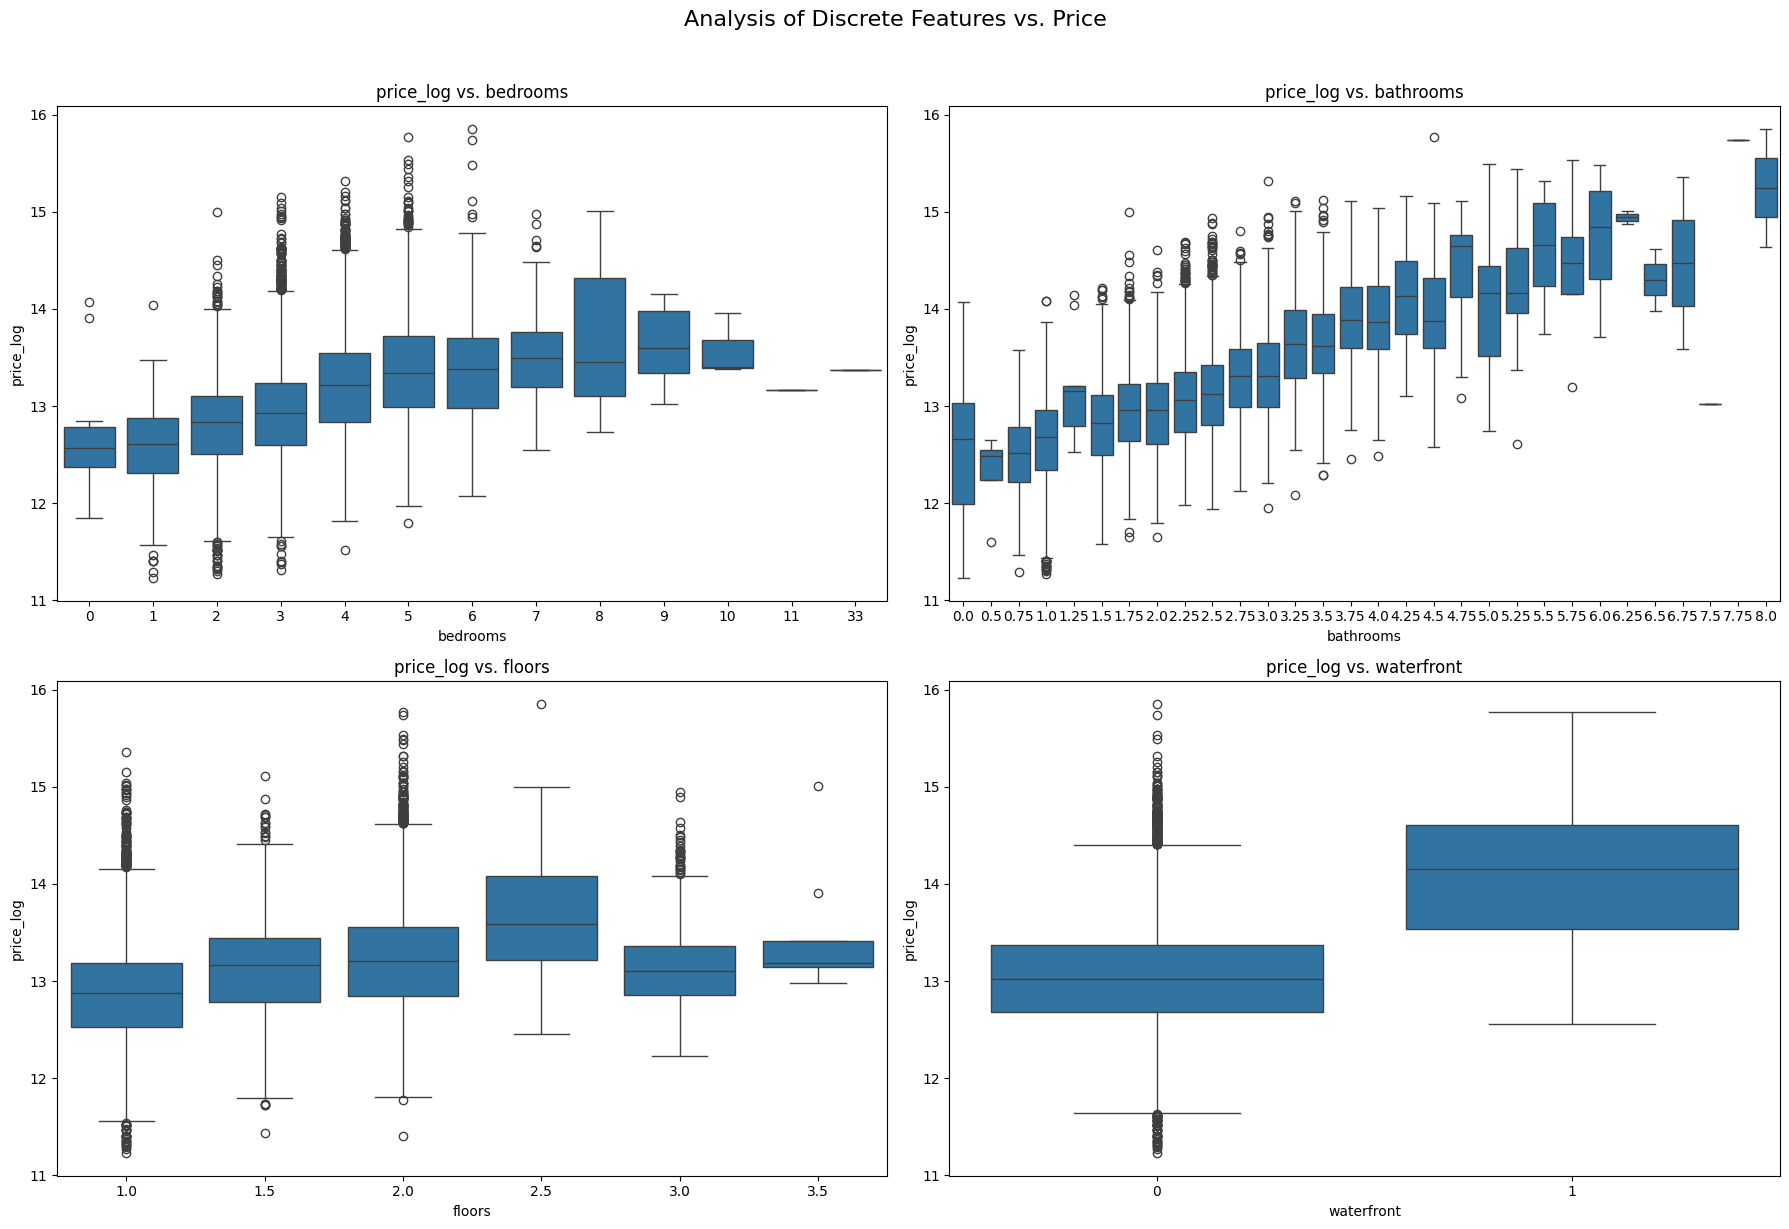

In [27]:
# List of discrete features
discrete_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Analysis of Discrete Features vs. Price', fontsize=16, y=1.02)
axes = axes.flatten() 

for i, col in enumerate(discrete_cols):
    sns.boxplot(x=col, y='price_log', data=df, ax=axes[i])
    axes[i].set_title(f'price_log vs. {col}')

plt.tight_layout()
plt.show()

### Analysis of Price vs Discrete Features
The bedroom column is a bit messy due to the outliers, the rest are fine and show a positive correlation.
We can handle the outliers in the bedroom column by dropping those rows

In [28]:
df = df[df['bedrooms'] < 10]
df.shape

(21608, 18)

### Categorical/Ordinal Features vs Price Analysis
Categorical/Ordinal: ['condition', 'grade', 'view']

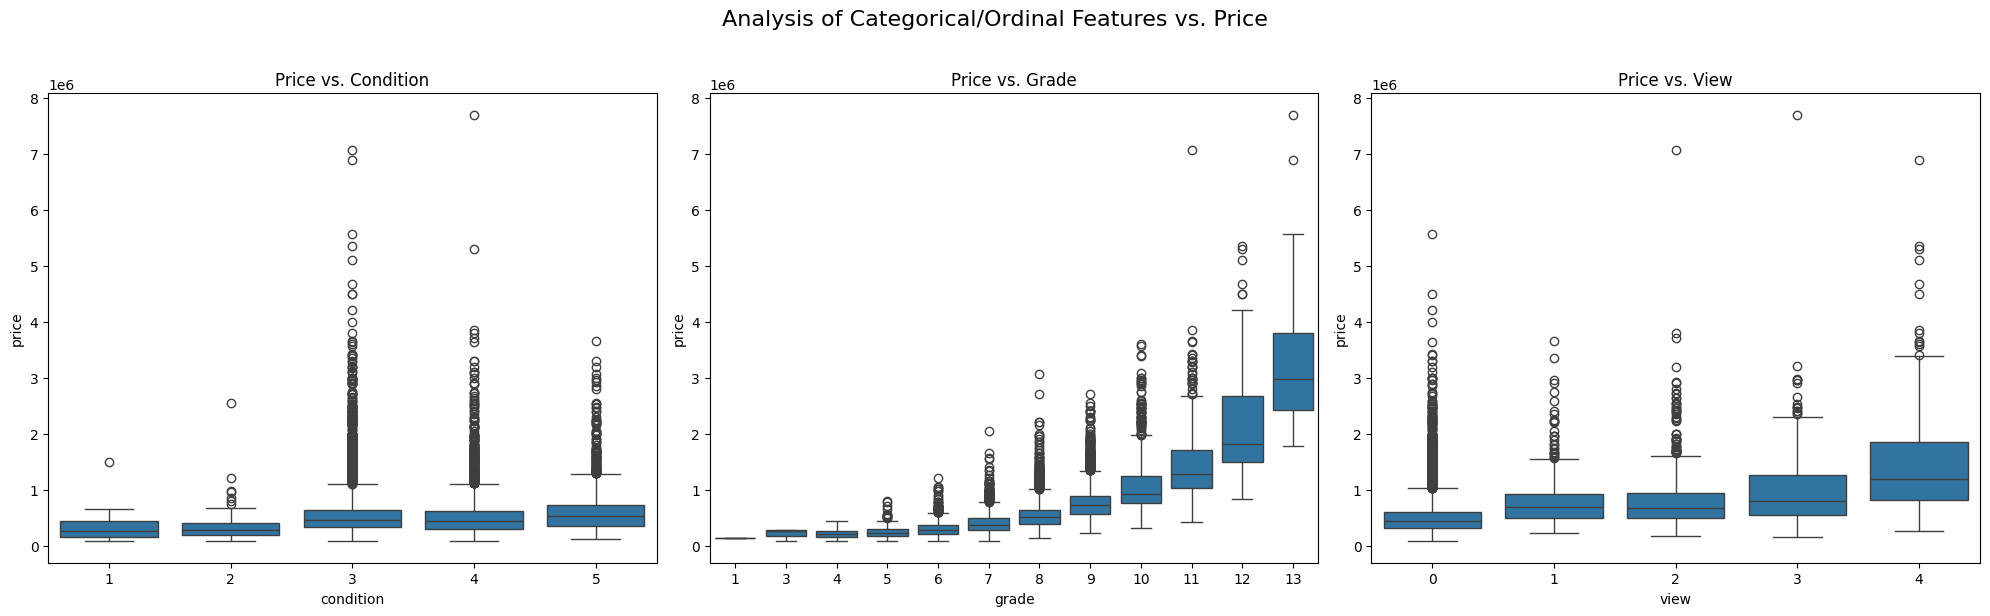

In [29]:
# List of key categorical/ordinal features
cat_ord_cols = ['condition', 'grade', 'view']

# Create a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Analysis of Categorical/Ordinal Features vs. Price', fontsize=16, y=1.02)

# Plot for 'condition'
# We sort the x-axis to make it easier to read
sns.boxplot(x='condition', y='price', data=df, ax=axes[0], order=sorted(df['condition'].unique()))
axes[0].set_title('Price vs. Condition')

# Plot for 'grade'
sns.boxplot(x='grade', y='price', data=df, ax=axes[1], order=sorted(df['grade'].unique()))
axes[1].set_title('Price vs. Grade')

# Plot for 'view'
sns.boxplot(x='view', y='price', data=df, ax=axes[2], order=sorted(df['view'].unique()))
axes[2].set_title('Price vs. View')

plt.tight_layout()
plt.show()

### Definitions
Grade - overall quality of construction, workmanship, and architectural design of the housing unit. 

### Analysis of Categorical/Oridinal vs Price
These features show a clear, positive correlation.


In [30]:
# 1. Calculate the mean for 'price' and 'price_log' grouped by 'condition'
# We also add 'count' to see how many houses are in each group
condition_summary = df.groupby('condition').agg(
    count=('price', 'count'),
    mean_price=('price', 'mean'),
    mean_price_log=('price_log', 'mean')
).sort_index()

# 2. Format the 'mean_price' to be readable as currency
condition_summary['mean_price'] = condition_summary['mean_price'].map('${:,.2f}'.format)

print("--- Summary of Price by Condition ---")
display(condition_summary)

--- Summary of Price by Condition ---


,count,mean_price,mean_price_log
condition,,,
1,30,"$334,431.67",12.491178
2,172,"$327,287.15",12.538104
3,14029,"$541,971.62",13.056318
4,5677,"$521,153.25",13.011830
5,1700,"$612,401.86",13.158091


## Feature Engineering

For yr_built and yr_renovated.
A house built in 1950 is different from house built in 1950 but renovated in 2015.

Hence, we create effective_age column for the age of the house from its last update.
We plot this feature against price.

**Key info**
- effective_age = the age of the house when it was sold.
- df['effective_year'] is created by using yr_built and yr_renovated, if yr_renovated exists, we use that, else we use yr_built. The 'effective_yr' is a binary column
- Then we create 'effective_age' by sale_year - effective_year to get the age of the house when it was sold.

In [31]:
df['yr_renovated'].head()

0       0
1    1991
2       0
3       0
4       0
Name: yr_renovated, dtype: int64

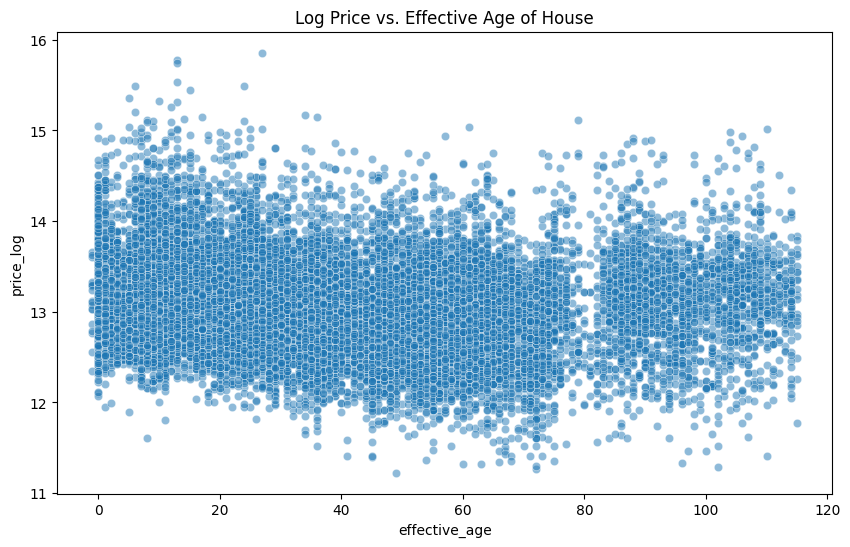

In [32]:
# 1 if yr_renovated is not 0, else 0
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)

# get effective_year
# use renovation year if exists, else use built year
df['effective_year'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] > 0 else row['yr_built'], axis=1)

# create effective age from the sale_year
df['effective_age'] = df['sale_year'] - df['effective_year']

# 4. Plot it
plt.figure(figsize=(10, 6))
sns.scatterplot(x='effective_age', y='price_log', data=df, alpha=0.5)
plt.title('Log Price vs. Effective Age of House')
plt.show()

In [33]:
# now drop yr_built and yr_renovated
cols_to_drop = [
    'yr_built',         # Replaced by 'effective_age'
    'yr_renovated',     # Replaced by 'effective_age'
]
df = df.drop(columns=cols_to_drop)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'sale_year', 'sale_month', 'price_log',
       'sqft_living_log', 'sqft_lot_log', 'sqft_living15_log',
       'sqft_lot15_log', 'was_renovated', 'effective_year', 'effective_age'],
      dtype='object')

In [34]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

### Correlation Heatmap

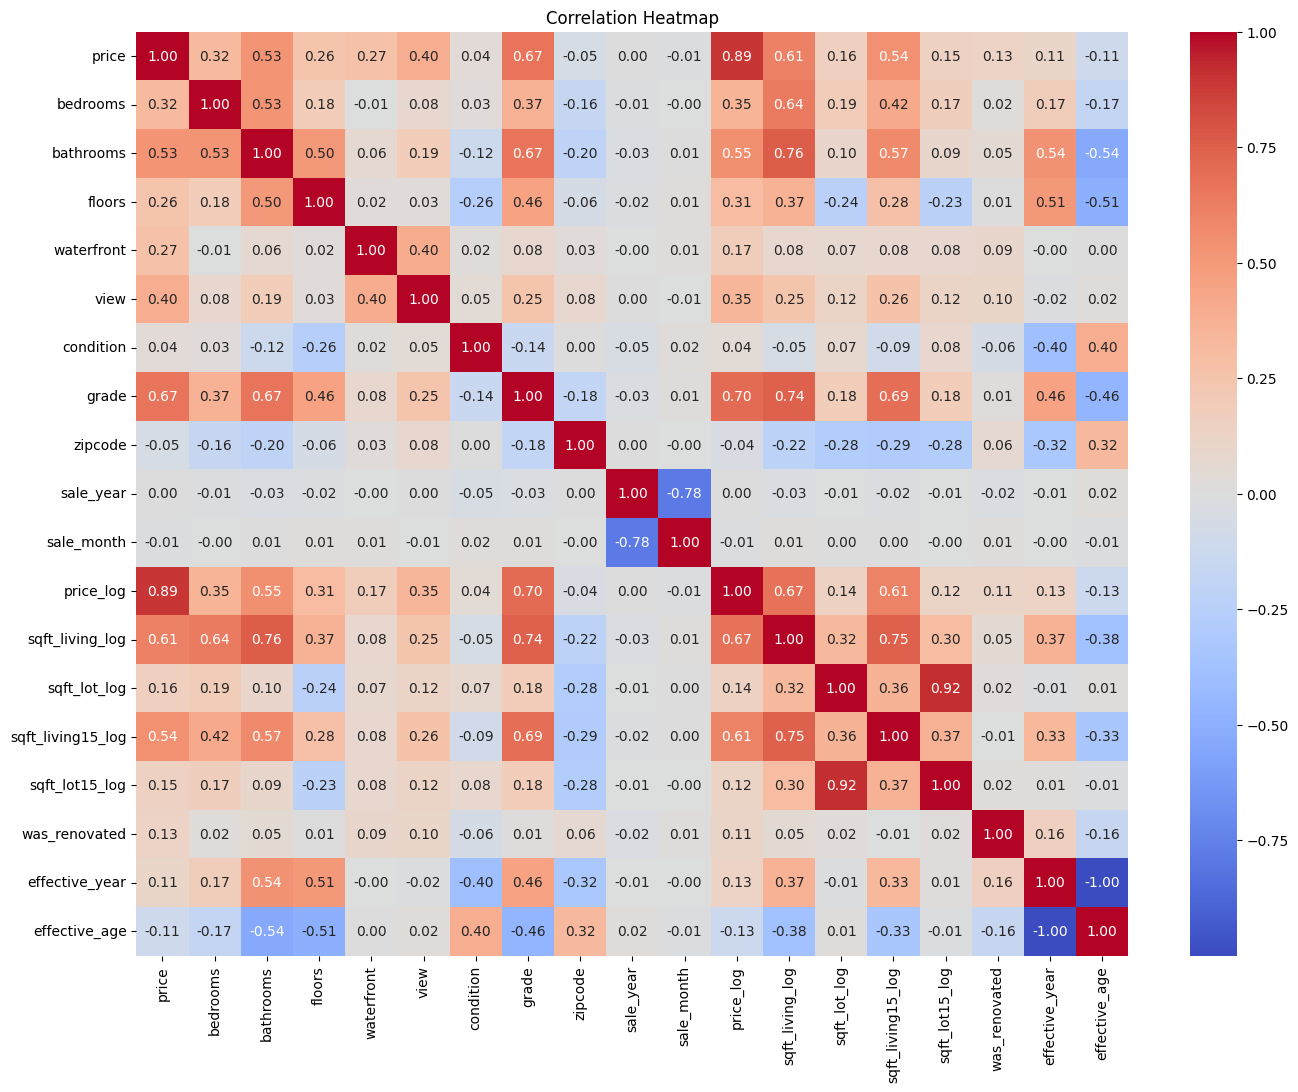

In [35]:
#use log-transformed price for a clearer correlation
# df['price_log'] = np.log1p(df['price'])

# Select all numerical columns, including our new date features
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Analysis

**Color interpretion**
- Brighter squares means stronger positive correlation.
- Darker squares means stronger negative correlation
- Netural squares indicate weaker correaltion.

**Best predictors** (See Target (price_log) row)
- grade (0.70)
- sqft_living_log (0.67)
- sqft_living15_log (0.61)
- bathrooms (0.55)
- bedrooms (0.35)
- view (0.35)

<b>Multicolinearity</b>

Multicolinearity = two features highly related to each other and "telling the model the same story." (look for bright or dark squares between two different features.)
- effective_year and effective_age have -1.0 squares (needs preprocessing)
- sqft_living_log and sqft_living15_log have 0.75 (Not an issue)
- sqft_lot_log and sqft_lot15_log have 0.92 (needs preprocessing)

**Next Steps**
- We will keep effective_age, then we will drop sale_year and effective_year to decrease redundancy (because effective_age was created from those columns)
- We will keep sqft_lot_log and drop sqft_lot15_log, because they have strong correlation and basically tell the model the same story. To prevent our regression model from being unstable, we will drop the sqft_lot15_log which has lower correlation with price_log than sqft_lot_log.


# 🧹 Data Preprocessing To-Do List

Here are the required preprocessing steps for our model, based on our EDA findings.

### 1. Initial Data Cleaning

First, we need to clean up the dataset by removing clear outliers.
    ```
1.  **Handle 'bedrooms' Outlier:** Remove the row(s) with clear data entry errors.
    ```python
    df = df[df['bedrooms'] < 30]
    ```

### 2. Feature Engineering

Next, we'll create new, more powerful features from the existing columns.

1.  **Handle `date` Column:**
    * Convert `date` to a `datetime` object.
    * Extract `sale_year` and `sale_month`.
    ```python
    df['date'] = pd.to_datetime(df['date'])
    df['sale_year'] = df['date'].dt.year
    df['sale_month'] = df['date'].dt.month
    ```
2.  **Handle `yr_built` and `yr_renovated`:**
    * Create a binary `was_renovated` feature.
    * Create an `effective_year` feature (uses `yr_renovated` if it exists, else `yr_built`).
    * Create `effective_age` (age of the house at the time of sale).
    ```python
    df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)
    df['effective_year'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] > 0 else row['yr_built'], axis=1)
    df['effective_age'] = df['sale_year'] - df['effective_year']
    ```

### 3. Transforming Skewed Features

We need to apply a log transform to our right-skewed target and predictor variables to normalize them.

1.  **Target Variable (`price`):**
    ```python
    df['price_log'] = np.log1p(df['price'])
    ```
2.  **Skewed Predictors:**
    ```python
    df['sqft_living_log'] = np.log1p(df['sqft_living'])
    df['sqft_lot_log'] = np.log1p(df['sqft_lot'])
    df['sqft_living15_log'] = np.log1p(df['sqft_living15'])
    df['sqft_lot15_log'] = np.log1p(df['sqft_lot15'])
    ```

### 4. Dropping Unnecessary Columns

Now we drop all the original, redundant, or replaced columns.

```python
# We're keeping 'price_log'
cols_to_drop = [
    'price',            # Replaced by 'price_log'
    'date',             # Replaced by 'sale_year', 'sale_month'
    'sqft_above',       # Redundant with 'sqft_living'
    'sqft_basement',    # Redundant with 'sqft_living'
    'yr_built',         # Replaced by 'effective_age'
    'yr_renovated',     # Replaced by 'effective_age'
    'sale_year',        # Replaced by 'effective_age'
    'effective_year',   # Replaced by 'effective_age'
    'lat',              # We are using zipcode instead
    'long',             # We are using zipcode instead
    'sqft_living',      # Replaced by 'sqft_living_log'
    'sqft_lot',         # Replaced by 'sqft_lot_log'
    'sqft_living15',    # Replaced by 'sqft_living15_log'
    'sqft_lot15',        # Replaced by 'sqft_lot15_log (which is also dropped to prevent redundancy)'  
    'sqft_lot15_log'    # Removed to prevent redundancy because sqft_lot_log is the same as this one
]

df_processed = df.drop(columns=cols_to_drop)

### 5. One-Hot-Encoding for Categorical Features.

Please see the number of unique values of the categorical columns and determine if one-hot-encoding is possible.

### Final Steps (IMPORTANT)
This must be done after creating the processed DataFrame.

Define X (features) and y (target):

- y is df_processed['price_log']

- X is everything else in df_processed.

Train-Test Split:

- Split X and y into training and testing sets.
        Python
        `from sklearn.model_selection import train_test_split

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        `

Scale Numerical Features:

- Fit a StandardScaler only on X_train.

- Transform both X_train and X_test with the fitted scaler.

- Note: Don't scale binary features like waterfront or was_renovated.